## **Image classification using CNN on CIFAR10 dataset**




In this notebook, I will try the process of implementing CNN with Keras in order to classify images.




### **1-Firstly, we'll import usefull packages:**


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
import matplotlib.pyplot as plt
import numpy as np 

### **2-Then, we'll load the data, before visualize and preprocess it:**


In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.astype(int)

In [ ]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1])

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(2,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index].astype(int)])


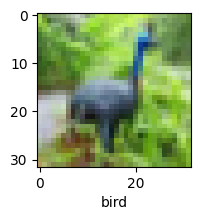

In [ ]:
plot_sample(x_train,y_train,6)

In [ ]:
# normalizing data
x_train=x_train/255
x_test=x_test/255

### **4-We'll try a simple ANN model and then we will evaluate its performances:**

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')]
    )
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 347s 221ms/step - loss: 1.8808 - accuracy: 0.3286
Epoch 2/6
1563/1563 [==============================] - 366s 234ms/step - loss: 1.6541 - accuracy: 0.4059
Epoch 3/6
1563/1563 [==============================] - 309s 198ms/step - loss: 1.5752 - accuracy: 0.4352
Epoch 4/6
1563/1563 [==============================] - 296s 189ms/step - loss: 1.5276 - accuracy: 0.4528
Epoch 5/6
1563/1563 [==============================] - 306s 196ms/step - loss: 1.4860 - accuracy: 0.4660
Epoch 6/6
1563/1563 [==============================] - 331s 212ms/step - loss: 1.4555 - accuracy: 0.4801


### **4-We'll try a simple CNN model and then we will evaluate its performances:**

---




In [ ]:
cnn=models.Sequential([
    tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=6)

Epoch 1/6
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5562 - accuracy: 0.4363
Epoch 2/6
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2984 - accuracy: 0.5356
Epoch 3/6
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1781 - accuracy: 0.5821
Epoch 4/6
1563/1563 [==============================] - 35s 22ms/step - loss: 1.0900 - accuracy: 0.6165
Epoch 5/6
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0131 - accuracy: 0.6447
Epoch 6/6
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9379 - accuracy: 0.6742


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 1.0874 - accuracy: 0.6318


[1.0873547792434692, 0.6317999958992004]

In [ ]:
y_pred=cnn.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 9ms/step


In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

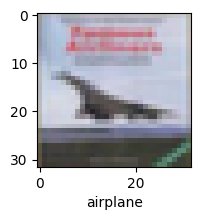

In [ ]:
plot_sample(x_test,y_test,3)

In [ ]:
classes[y_pred_classes[3]]

'airplane'